# Part 4 : reading and writing files
- text files
- csv files
- excel(.xlsx) files
- json files
- numpy files
- HDF5 (.h5) files
- Parquet files
- SAS data sets

In [1]:
## import modules
import numpy as np

## Text files
Reading and writing text files


In [2]:
## reading text files
with open("./data/raw/text_file1.txt") as file_object:
    text1 = file_object.read()
print(text1)
print("Type of text1 : ", type(text1))

Subjid	Visit	Value
01-001	visit 1	186
01-001	visit 2	180
01-001	visit 3	185
01-001	visit 4	187
01-002	visit 1	183
01-002	visit 2	182
01-002	visit 3	181
01-002	visit 4	180
Type of text1 :  <class 'str'>


In [3]:
## writing text files to local drive
with open("./data/out/text_out3.txt", 'w') as file_object1:  ## 'w' is write option. You can use 'a' to append.
    file_object1.write("This is great. I can add text using this")  ## write to open text file.  


This is the output. 
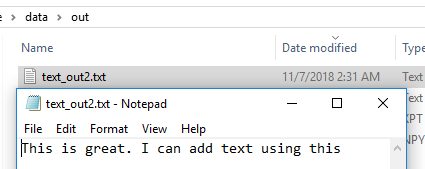

### use dataframe to import and write text files

In [4]:
## Import pandas modules
from pandas import DataFrame
import pandas as pd

Use pandas to import text file into data frame. 
<br>Each columns is tab-delimited
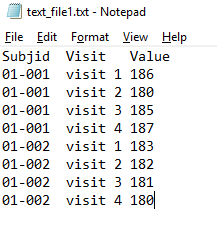

In [5]:
## Reading text (txt) files using pandas read_table method
filename = "./data/raw/text_file1.txt"
txt1 = pd.read_table(filename) ## read text files into dataframe
print(txt1)
print("Type: ", type(txt1))

   Subjid    Visit  Value
0  01-001  visit 1    186
1  01-001  visit 2    180
2  01-001  visit 3    185
3  01-001  visit 4    187
4  01-002  visit 1    183
5  01-002  visit 2    182
6  01-002  visit 3    181
7  01-002  visit 4    180
Type:  <class 'pandas.core.frame.DataFrame'>


In [6]:
## sort txt file by subjid and visit
txt1 = txt1.sort_values(by=['Subjid', 'Visit'])
group1 = txt1.groupby(txt1.Subjid).last()
print(group1)
print(type(group1))

          Visit  Value
Subjid                
01-001  visit 4    187
01-002  visit 4    180
<class 'pandas.core.frame.DataFrame'>


In [7]:
## Baseline and change from baseline addition
txt2 = txt1.copy()
print("Original data : \n", txt2)  ## original data
for col1, group2 in txt2.groupby('Subjid'): ## Nesting into subjid group. Each group has all rows for each subjid
    no_count = 0 
    print("\n data grouped-by subjid: \n", group2)
    for index, series1 in group2.iterrows(): ## Nesting into each row in subjid-group
    
        if no_count == 0:  ## frist record of each group
            base = txt2.loc[index,'Value']  ## assign baseline
        txt2.loc[index, 'base'] = base  ## assign baseline value to each iteration
        txt2.loc[index, 'chg'] = txt2.loc[index,'Value'] - base  ## calculate change from baseline
        no_count += 1  ## add the count
print("\n New data with baseline and change from baseline: \n", txt2)    

Original data : 
    Subjid    Visit  Value
0  01-001  visit 1    186
1  01-001  visit 2    180
2  01-001  visit 3    185
3  01-001  visit 4    187
4  01-002  visit 1    183
5  01-002  visit 2    182
6  01-002  visit 3    181
7  01-002  visit 4    180

 data grouped-by subjid: 
    Subjid    Visit  Value
0  01-001  visit 1    186
1  01-001  visit 2    180
2  01-001  visit 3    185
3  01-001  visit 4    187

 data grouped-by subjid: 
    Subjid    Visit  Value
4  01-002  visit 1    183
5  01-002  visit 2    182
6  01-002  visit 3    181
7  01-002  visit 4    180

 New data with baseline and change from baseline: 
    Subjid    Visit  Value   base  chg
0  01-001  visit 1    186  186.0  0.0
1  01-001  visit 2    180  186.0 -6.0
2  01-001  visit 3    185  186.0 -1.0
3  01-001  visit 4    187  186.0  1.0
4  01-002  visit 1    183  183.0  0.0
5  01-002  visit 2    182  183.0 -1.0
6  01-002  visit 3    181  183.0 -2.0
7  01-002  visit 4    180  183.0 -3.0


### creating text file in local drive
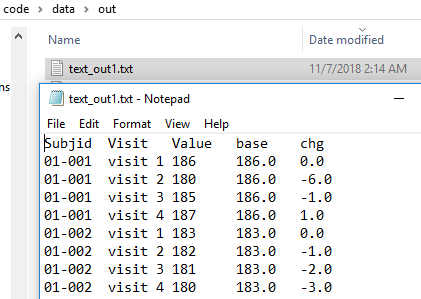


In [8]:
## Writing text files to local drive
txt2.to_csv(r'./data/out/text_out1.txt', header=True, index=None, sep='\t', mode='w') ## include header,tab-delimited, write-mode

## CSV file

In [9]:
## read csv files into data frame
csv1 = pd.read_csv('./data/raw/csv_file1.csv')
print(csv1)

   SUBJID SEX   RACE      ARM    BIRTHDTC
0  01-001   M  Black  Placebo  1990-10-02
1  01-002   F  White   Drug 1  1978-04-19
2  01-003   M  Asian   Drug 2  1985-11-23


In [10]:
print("type of date: ", type(csv1.BIRTHDTC[0]))

type of date:  <class 'str'>


In [11]:
## write data frame to csv files
csv1.to_csv("./data/out/csv_out1.csv", index=False)

## Excel (.xlsx) files

In [12]:
## read csv files into data frame
xlsx1 = pd.read_excel('./data/raw/xlsx_file1.xlsx')
print(xlsx1)

   SUBJID SEX   RACE      ARM    BIRTHDTC FORMAT
0  01-001   M  Black  Placebo  1990-02-23   xsls
1  01-002   F  White   Drug 1  1978-02-05   xsls
2  01-003   M  Asian   Drug 2  1996-11-12   xsls


In [13]:
## add the new column using np.where condition 
xlsx2 = xlsx1.copy()
xlsx2['ARMCD']=np.where(xlsx2.ARM =='Placebo', 'P','D')  ## if xlxs2.ARM == 'Placebo', then xlsx2.ARMCD = 'P', else 'D'
print(xlsx2)

   SUBJID SEX   RACE      ARM    BIRTHDTC FORMAT ARMCD
0  01-001   M  Black  Placebo  1990-02-23   xsls     P
1  01-002   F  White   Drug 1  1978-02-05   xsls     D
2  01-003   M  Asian   Drug 2  1996-11-12   xsls     D


In [14]:
## write data frame into local excel file
writer = pd.ExcelWriter('./data/out/excel_out1.xlsx')
xlsx2.to_excel(writer,'Demographics', index=False)
writer.save()

Saved file in local drive
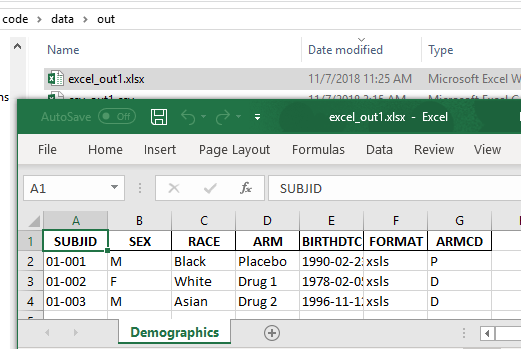

## JSON files
The imported json files could show
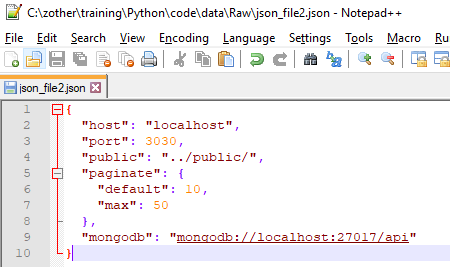
json file will be imported into dictionary. 

In [15]:
import json

In [16]:
with open("./data/raw/json_file2.json","r") as f2:
    jsondata2=json.load(f2)
f2.close()
jsondata2

{'host': 'localhost',
 'port': 3030,
 'public': '../public/',
 'paginate': {'default': 10, 'max': 50},
 'mongodb': 'mongodb://localhost:27017/api'}

In [17]:
print("Type of imported json file is ", type(jsondata2))
df2 = pd.DataFrame.from_dict(jsondata2)
print("\n", df2)
print("\nType is ", type(df2))

Type of imported json file is  <class 'dict'>

               host  port      public  paginate                        mongodb
default  localhost  3030  ../public/        10  mongodb://localhost:27017/api
max      localhost  3030  ../public/        50  mongodb://localhost:27017/api

Type is  <class 'pandas.core.frame.DataFrame'>


In [18]:
## dictionary
raw = {'subjid': ['01-001', '01-002', '01-003', '02-001'],
      'siteid': ['01','01','01','02'],
      'sex': ['M','F','F','M'],
      'age': [29, 40, 35, 56]}
print(raw)
print("\nType is ", type(raw))

{'subjid': ['01-001', '01-002', '01-003', '02-001'], 'siteid': ['01', '01', '01', '02'], 'sex': ['M', 'F', 'F', 'M'], 'age': [29, 40, 35, 56]}

Type is  <class 'dict'>


In [19]:
json3 = json.dumps(raw)
f3 = open("./data/out/json_out1.json","w")
f3.write(json3)
f3.close()

Python dictionary file is saved into json file. 
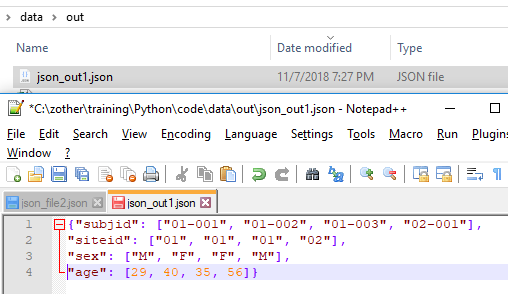

## numpy files
np.save will create files in 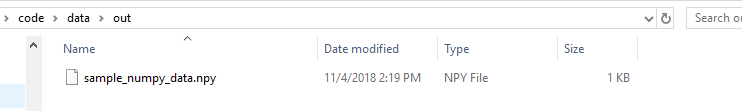

In [20]:
import numpy as np
numpy1 = np.array([1,2,3,4,5,6,7,8,9])
np.save('./data/out/sample_numpy_data', numpy1)

In [21]:
## Reading numpy files in local drive
numpy2 = np.load('./data/out/sample_numpy_data.npy')
numpy2

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

## Hierchical Data Format (HDF5) files
Binary files that can be easily read and write in large number. <br>
It won't be read by the editor like notepad++.  It requires the specical editor to read. 

In [22]:
import h5py

In [23]:
## Read local HDF file
hdf1 = h5py.File('./data/raw/hdf_file1.h5', "r")
print(hdf1, ". The type is ", type(hdf1))
print("List of datasets in HDF files is", list(hdf1.keys()))  ## List of datasets in HDF5 file

<HDF5 file "hdf_file1.h5" (mode r)> . The type is  <class 'h5py._hl.files.File'>
List of datasets in HDF files is ['list_classes', 'test_set_x', 'test_set_y']


In [24]:
hdf1_1 = hdf1['list_classes']  ## one of datasets in HDF5 files
print(hdf1_1)

<HDF5 dataset "list_classes": shape (2,), type "|S7">


In [25]:
## Extract dataset from HDF5 file
hdf1_2 = hdf1['test_set_x']
print(hdf1_2)
print("Shape is ", hdf1_2.shape)
print("Type is ", type(hdf1_2))
print("Date Type is ", hdf1_2.dtype)

<HDF5 dataset "test_set_x": shape (50, 64, 64, 3), type "|u1">
Shape is  (50, 64, 64, 3)
Type is  <class 'h5py._hl.dataset.Dataset'>
Date Type is  uint8


In [26]:
## convert h5py.dataset into array
hdf1_2_array = np.array(hdf1_2)
print(type(hdf1_2_array))
print(hdf1_2_array)

<class 'numpy.ndarray'>
[[[[158 104  83]
   [161 106  85]
   [162 107  84]
   ...
   [170 120 100]
   [167 121 103]
   [172 127 109]]

  [[158 103  82]
   [160 104  82]
   [162 105  83]
   ...
   [169 118  99]
   [164 117  98]
   [168 121 104]]

  [[158 104  82]
   [161 105  82]
   [162 105  83]
   ...
   [173 123 102]
   [169 122 104]
   [168 122 104]]

  ...

  [[102  68  52]
   [ 44  31  23]
   [ 28  23  20]
   ...
   [163 118 102]
   [163 120 103]
   [166 121 105]]

  [[ 99  67  51]
   [ 38  28  22]
   [ 30  26  23]
   ...
   [161 117 100]
   [164 121 104]
   [168 123 106]]

  [[127  95  72]
   [ 39  29  22]
   [ 30  25  22]
   ...
   [165 122 105]
   [169 126 109]
   [173 128 110]]]


 [[[115 110 111]
   [137 129 129]
   [155 146 145]
   ...
   [159 156 157]
   [141 141 145]
   [121 122 127]]

  [[123 118 120]
   [143 136 136]
   [159 153 150]
   ...
   [167 164 165]
   [151 151 154]
   [130 133 137]]

  [[135 130 130]
   [150 145 141]
   [164 159 153]
   ...
   [173 174 172]
   [

In [27]:
## writing HDF file in the local drive
arr1= np.random.randn(10,100)

with h5py.File('./data/out/hdf_out1.h5', 'w') as f:
    dset = f.create_dataset("array1", data=arr1)

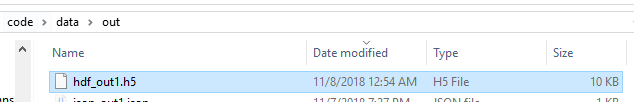

In [28]:
## Reading HDF file from the same drive
with h5py.File('./data/out/hdf_out1.h5', 'r') as f:
    hdf2= f['array1']  ## extract array1 dataset from HDF5 file
    hdf2_array = np.array(hdf2) ## convert to numpy
print(hdf2)  # closed HDF file.  You need to convert inside with statement
print("Type of array1 dataset from HDF file: ", type(hdf2))
print(hdf2_array)

<Closed HDF5 dataset>
Type of array1 dataset from HDF file:  <class 'h5py._hl.dataset.Dataset'>
[[-1.20258536  0.13540647  0.97783761  0.34477753 -0.14730814  1.99285499
   0.06442922  0.13165778  2.51007569  1.31197473  0.34126237 -0.52481795
  -1.13888501 -1.35367497  0.33344211  0.34298353  1.05004652 -0.65195891
   1.99288216  0.75527931  2.00015729  1.07748972  1.21185774  1.13475463
  -0.24058567  0.66963489  0.64200833 -1.20575067 -0.40971636 -0.66230666
   0.12979258  0.12948457  0.40210357  0.83369406 -2.44136593 -0.6111243
  -1.73545871  2.1372861  -0.17862438  0.23293531 -0.50194371 -0.18625781
   0.56993747  1.26573965 -0.41039809 -0.85569289  0.5701794  -1.72351237
   1.26892683 -2.22814594 -0.14778465  0.27502517  0.24171477  1.01871131
   0.83295942 -0.28095178  0.89800957 -0.79215938 -0.46397576 -0.51517761
  -0.60112659  0.54868295 -1.27581117 -1.01234567  1.0950514   1.42065623
   1.63866718 -0.52150079  1.97100711  0.48696899 -2.17685164 -0.81075533
  -0.44596056  0.

## Parquet File
Similar to CSV file, Parquet is a file format, which is designed as columnal storage to support complex data processing. 
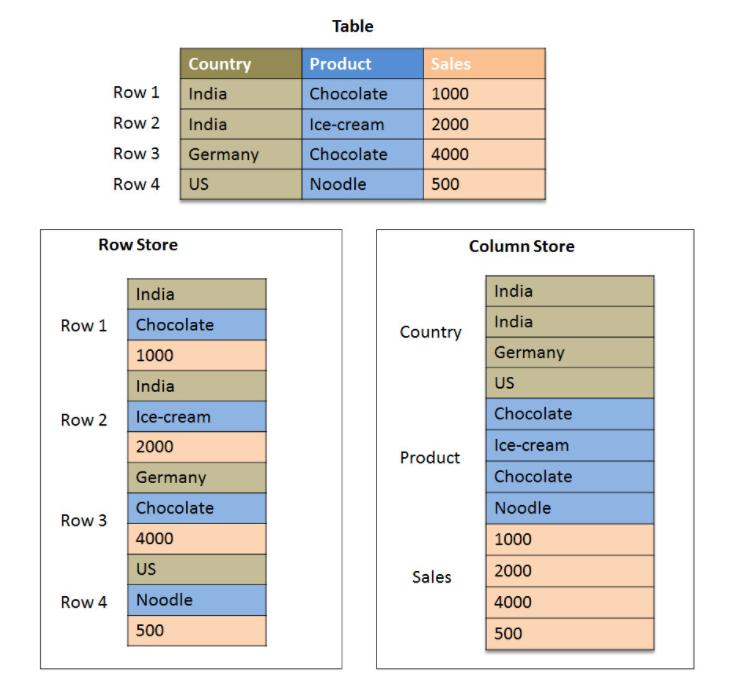
For example, <br>
SELECT country, SUM(Sales)  <br>
FROM products_sales  <br>
WHERE country ='India'  <br>
GROUP BY product  <br> <br>
- CSV file will read the entire file row-by-row
- Parquet will first find only the relevant "data blocks" based on the filter criteria and only aggregate the rows/columns that match the filter criteria

### Difference between Parquet and CSV in Big Data performance
| Dataset | Size on Amazon S3 | Query Run time | Data Scanned | Cost ($) |
| --- | --- | --- | --- | --- |
| CSV | 1 TB | 236 seconds | 1.15 TB | 5.75  |
| Parquet | 130 GB | 6.78 seconds | 2.51 GB | 0.01  |

In [29]:
print("Original dataframe : \n", xlsx1)

Original dataframe : 
    SUBJID SEX   RACE      ARM    BIRTHDTC FORMAT
0  01-001   M  Black  Placebo  1990-02-23   xsls
1  01-002   F  White   Drug 1  1978-02-05   xsls
2  01-003   M  Asian   Drug 2  1996-11-12   xsls


In [31]:
## Writing parquet file in the local drive
from fastparquet import write 
write('./data/out/parquet_file.parquet', xlsx2)

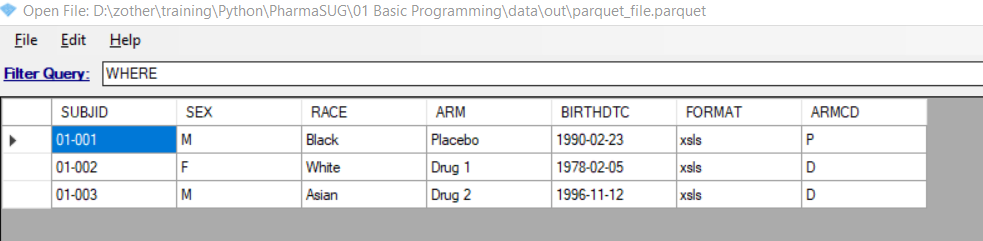

In [32]:
## Read parquet fire from 
from fastparquet import ParquetFile
df_parquet_read = ParquetFile('./data/out/parquet_file.parquet')
df_parquet_read2  = df_parquet_read.to_pandas()
df_parquet_read2.head()

SUBJID SEX   RACE      ARM    BIRTHDTC FORMAT ARMCD
0  01-001   M  Black  Placebo  1990-02-23   xsls     P
1  01-002   F  White   Drug 1  1978-02-05   xsls     D
2  01-003   M  Asian   Drug 2  1996-11-12   xsls     D

# Read and Write SAS datasets from local drive
We will explore how we can read and write SAS datasets from local drive to Python kernel of Jupyter notebook.  
We will discuss three ways to play with SAS datasets
-  pandas.read_sas
-  xport package
-  sas7bdat package
-  pyreadstat package

## Read SAS datasets
### For sas7bdat : 
    with SAS7BDAT('./data/in/adtteos.sas7bdat') as file: <br>
       df_dm = file.to_data_frame() <br>
    
    _dm = pd.read_sas('./data/in/adtteos.sas7bdat', format='sas7bdat', encoding='utf-8')  <br>

    dm_sas7bdat_pyread, meta = pyreadstat.read_sas7bdat('./data/raw/adtteos.sas7bdat') <br>


### For xport 
    with open('./data/in/dm.xpt', 'rb') as f: <br>
        _xport_dm = xport.to_columns(f) <br> 
        _xport_dm2 = pd.DataFrame(_xport_dm)    <br>
    
    _dm = pd.read_sas('./data/in/dm.xpt', format='xport', encoding='utf-8')  <br>
    
    dm_sas7bdat_pyread, meta = pyreadstat.read_xport('./data/raw/dm.xpt')
  


In [34]:
### Import modules
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
import xport  ## write sas datasets to local drive
from sas7bdat import SAS7BDAT  ## read SAS datasets from local drive
import pyreadstat

### SAS7BDAT Package

In [35]:
with SAS7BDAT('./data/raw/adtteos.sas7bdat') as file: 
    df_adtteos = file.to_data_frame()
df_adtteos.head()

SUBJID SITEID FASFL SAFFL        TRTP  TRTPN          PARAM PARAMCD  \
0  310-001    310     Y     Y     Control    1.0  Days to Death   DEATH   
1  310-002    310     Y     Y     Control    1.0  Days to Death   DEATH   
2  310-003    310     Y     Y  Study Drug    2.0  Days to Death   DEATH   
3  310-004    310     Y     Y  Study Drug    2.0  Days to Death   DEATH   
4  310-005    310     Y     Y  Study Drug    2.0  Days to Death   DEATH   

  PARAMTYP               AVISIT  AVISITN  AVAL     STARTDT         ADT ADTF  \
0  DERIVED  Double-Blind Period     91.0   1.0  2007-11-12  2007-11-12        
1  DERIVED  Double-Blind Period     91.0  83.0  2008-01-11  2008-04-02        
2  DERIVED  Double-Blind Period     91.0  84.0  2008-02-01  2008-04-24        
3  DERIVED  Double-Blind Period     91.0   9.0  2008-02-07  2008-02-15        
4  DERIVED  Double-Blind Period     91.0  51.0  2008-02-21  2008-04-11        

   CNSR                       EVNTDESC  
0   0.0                          DEATH  
1   1.0  COMPLETE PERIOD WITHOUT EVENT  
2   0.0                          DEATH  
3   0.0                          DEATH  
4   0.0                          DEATH

In [37]:
with open('./data/raw/dm.xpt', 'rb') as f: 
    _xport_dm = xport.to_columns(f)
    _xport_dm2 = pd.DataFrame(_xport_dm) 
_xport_dm2.tail()
#print(_xport_dm)


STUDYID      USUBJID DOMAIN SUBJID     RFSTDTC     RFENDTC SITEID  \
301  CDISCPILOT01  01-718-1254     DM   1254  2013-07-10  2014-01-09    718   
302  CDISCPILOT01  01-718-1328     DM   1328  2013-02-01  2013-05-01    718   
303  CDISCPILOT01  01-718-1355     DM   1355  2013-02-28  2013-08-29    718   
304  CDISCPILOT01  01-718-1371     DM   1371  2013-04-26  2013-08-08    718   
305  CDISCPILOT01  01-718-1427     DM   1427  2012-12-17  2013-02-18    718   

      AGE   AGEU SEX                                               RACE  \
301  78.0  YEARS   M  HISPANIC (MEXICAN - AMERICAN, MEXICO, CENTRAL ...   
302  86.0  YEARS   M                                          CAUCASIAN   
303  79.0  YEARS   M                                          CAUCASIAN   
304  69.0  YEARS   F                                          CAUCASIAN   
305  74.0  YEARS   F                     AFRICAN DESCENT (NEGRO, BLACK)   

      ARMCD                   ARM COUNTRY       DMDTC  DMDY  
301  Xan_Lo   Xanomeline Low Dose     USA  2013-06-28 -12.0  
302  Xan_Hi  Xanomeline High Dose     USA  2013-01-28  -4.0  
303     Pbo               Placebo     USA  2013-02-12 -16.0  
304  Xan_Hi  Xanomeline High Dose     USA  2013-04-11 -15.0  
305  Xan_Hi  Xanomeline High Dose     USA  2012-12-13  -4.0

### pyreadstat package - developed by Roche
https://github.com/Roche/pyreadstat
- Read sas7bdat and xport with metadata

In [38]:
dm_sas7bdat_pyread, meta = pyreadstat.read_sas7bdat('./data/raw/adtteos.sas7bdat')
dm_sas7bdat_pyread.head()

SUBJID SITEID FASFL SAFFL        TRTP  TRTPN          PARAM PARAMCD  \
0  310-001    310     Y     Y     Control    1.0  Days to Death   DEATH   
1  310-002    310     Y     Y     Control    1.0  Days to Death   DEATH   
2  310-003    310     Y     Y  Study Drug    2.0  Days to Death   DEATH   
3  310-004    310     Y     Y  Study Drug    2.0  Days to Death   DEATH   
4  310-005    310     Y     Y  Study Drug    2.0  Days to Death   DEATH   

  PARAMTYP               AVISIT  AVISITN  AVAL     STARTDT         ADT ADTF  \
0  DERIVED  Double-Blind Period     91.0   1.0  2007-11-12  2007-11-12        
1  DERIVED  Double-Blind Period     91.0  83.0  2008-01-11  2008-04-02        
2  DERIVED  Double-Blind Period     91.0  84.0  2008-02-01  2008-04-24        
3  DERIVED  Double-Blind Period     91.0   9.0  2008-02-07  2008-02-15        
4  DERIVED  Double-Blind Period     91.0  51.0  2008-02-21  2008-04-11        

   CNSR                       EVNTDESC  
0   0.0                          DEATH  
1   1.0  COMPLETE PERIOD WITHOUT EVENT  
2   0.0                          DEATH  
3   0.0                          DEATH  
4   0.0                          DEATH

In [39]:
print(dir(meta), '\n')
print(meta.column_names_to_labels, '\n')
print(meta.original_variable_types)

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'column_labels', 'column_names', 'column_names_to_labels', 'file_encoding', 'file_format', 'file_label', 'missing_ranges', 'missing_user_values', 'notes', 'number_columns', 'number_rows', 'original_variable_types', 'readstat_variable_types', 'table_name', 'value_labels', 'variable_alignment', 'variable_display_width', 'variable_measure', 'variable_storage_width', 'variable_to_label', 'variable_value_labels'] 

{'SUBJID': 'Subject Identifier for the Study', 'SITEID': 'Study Site Identifier', 'FASFL': 'Full Analysis Set Population Flag', 'SAFFL': 'Safety Population Flag', 'TRTP': 'Planned Treatment', 'TRTPN': 'Planned Treatment (N)', 'PARAM': 'Param

In [40]:
dm_xport_pyread2, dm_meta2 = pyreadstat.read_xport('./data/raw/dm.xpt')
dm_xport_pyread2.head()

STUDYID      USUBJID DOMAIN SUBJID     RFSTDTC     RFENDTC SITEID  \
0  CDISCPILOT01  01-701-1015     DM   1015  2014-01-02  2014-07-02    701   
1  CDISCPILOT01  01-701-1023     DM   1023  2012-08-05  2012-09-02    701   
2  CDISCPILOT01  01-701-1028     DM   1028  2013-07-19  2014-01-14    701   
3  CDISCPILOT01  01-701-1033     DM   1033  2014-03-18  2014-04-14    701   
4  CDISCPILOT01  01-701-1034     DM   1034  2014-07-01  2014-12-30    701   

    AGE   AGEU SEX                                               RACE   ARMCD  \
0  63.0  YEARS   F  HISPANIC (MEXICAN - AMERICAN, MEXICO, CENTRAL ...     Pbo   
1  64.0  YEARS   M  HISPANIC (MEXICAN - AMERICAN, MEXICO, CENTRAL ...     Pbo   
2  71.0  YEARS   M                                          CAUCASIAN  Xan_Hi   
3  74.0  YEARS   M                                          CAUCASIAN  Xan_Lo   
4  77.0  YEARS   F                                          CAUCASIAN  Xan_Hi   

                    ARM COUNTRY       DMDTC  DMDY  
0               Placebo     USA  2013-12-26  -7.0  
1               Placebo     USA  2012-07-22 -14.0  
2  Xanomeline High Dose     USA  2013-07-11  -8.0  
3   Xanomeline Low Dose     USA  2014-03-10  -8.0  
4  Xanomeline High Dose     USA  2014-06-24  -7.0

### Using Pandas Read_sas function

In [41]:
_dm1 = pd.read_sas('./data/raw/dm.xpt', format='xport', encoding='utf-8')
_dm1.head()

STUDYID      USUBJID DOMAIN SUBJID     RFSTDTC     RFENDTC SITEID  \
0  CDISCPILOT01  01-701-1015     DM   1015  2014-01-02  2014-07-02    701   
1  CDISCPILOT01  01-701-1023     DM   1023  2012-08-05  2012-09-02    701   
2  CDISCPILOT01  01-701-1028     DM   1028  2013-07-19  2014-01-14    701   
3  CDISCPILOT01  01-701-1033     DM   1033  2014-03-18  2014-04-14    701   
4  CDISCPILOT01  01-701-1034     DM   1034  2014-07-01  2014-12-30    701   

    AGE   AGEU SEX                                               RACE   ARMCD  \
0  63.0  YEARS   F  HISPANIC (MEXICAN - AMERICAN, MEXICO, CENTRAL ...     Pbo   
1  64.0  YEARS   M  HISPANIC (MEXICAN - AMERICAN, MEXICO, CENTRAL ...     Pbo   
2  71.0  YEARS   M                                          CAUCASIAN  Xan_Hi   
3  74.0  YEARS   M                                          CAUCASIAN  Xan_Lo   
4  77.0  YEARS   F                                          CAUCASIAN  Xan_Hi   

                    ARM COUNTRY       DMDTC  DMDY  
0               Placebo     USA  2013-12-26  -7.0  
1               Placebo     USA  2012-07-22 -14.0  
2  Xanomeline High Dose     USA  2013-07-11  -8.0  
3   Xanomeline Low Dose     USA  2014-03-10  -8.0  
4  Xanomeline High Dose     USA  2014-06-24  -7.0

In [42]:
_dm2 = pd.read_sas('./data/raw/adtteos.sas7bdat', format='sas7bdat', encoding='utf-8')
_dm2.head()

SUBJID SITEID FASFL SAFFL        TRTP  TRTPN          PARAM PARAMCD  \
0  310-001    310     Y     Y     Control    1.0  Days to Death   DEATH   
1  310-002    310     Y     Y     Control    1.0  Days to Death   DEATH   
2  310-003    310     Y     Y  Study Drug    2.0  Days to Death   DEATH   
3  310-004    310     Y     Y  Study Drug    2.0  Days to Death   DEATH   
4  310-005    310     Y     Y  Study Drug    2.0  Days to Death   DEATH   

  PARAMTYP               AVISIT  AVISITN  AVAL    STARTDT        ADT ADTF  \
0  DERIVED  Double-Blind Period     91.0   1.0 2007-11-12 2007-11-12  NaN   
1  DERIVED  Double-Blind Period     91.0  83.0 2008-01-11 2008-04-02  NaN   
2  DERIVED  Double-Blind Period     91.0  84.0 2008-02-01 2008-04-24  NaN   
3  DERIVED  Double-Blind Period     91.0   9.0 2008-02-07 2008-02-15  NaN   
4  DERIVED  Double-Blind Period     91.0  51.0 2008-02-21 2008-04-11  NaN   

   CNSR                       EVNTDESC  
0   0.0                          DEATH  
1   1.0  COMPLETE PERIOD WITHOUT EVENT  
2   0.0                          DEATH  
3   0.0                          DEATH  
4   0.0                          DEATH

## Write SAS datasets
You can write SAS datasets using xport option.  Currently, only xpt format can be created in local drive.

In [43]:
## Write SAS datasets to local drive
with open('./data/out/xport_dm2.xpt', 'wb') as f:
    xport.from_dataframe(_xport_dm2, f)

Python xport function can create SAS xport dataset in local drive.
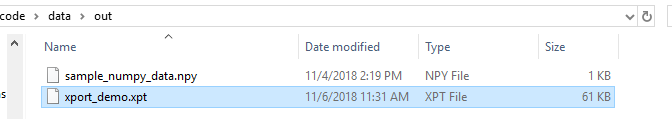

In [ ]:
## Write SAS datasets to local drive using pyreadstat - not writing properly
pyreadstat.write_xport(_xport_dm2, "./data/out/xport_dm_pyread2.xpt", table_name="Demographics")